In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [ ]:
-((4/7)*np.log2(4/7)+(3/7)*np.log2(3/7))

0.9852281360342515

In [ ]:
-((2/3)*np.log2(2/3)+(1/3)*np.log2(1/3))

0.9182958340544896

In [ ]:
0.9182958340544896*(3/7)

0.39355535745192405

In [ ]:
-((3/4)*np.log2(3/4)+(1/4)*np.log2(1/4))

0.8112781244591328

In [ ]:
0.8112781244591328*(4/7)

0.46358749969093305

In [ ]:
0.39355535745192405+0.46358749969093305

0.8571428571428571

In [ ]:
1-((4/7)**2+(3/7)**2)

0.48979591836734704

In [ ]:
wt=np.array([77,47,55,59,72,60,40,60,45,58])
np.mean((wt-np.mean(wt))**2)

118.41000000000001

In [ ]:
L=np.array([77,72,60])
R=np.array([47,55,59,60,40,45,58])

In [ ]:
np.mean((L-np.mean(L))**2)

50.88888888888889

In [ ]:
50.88888888888889+53.714285714285715

104.60317460317461

In [ ]:
np.mean((R-np.mean(R))**2)

53.714285714285715

In [2]:
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("/content/drive/My Drive/Python for ML-Mahesh Anand/prima-indians-diabetes.csv",names=colnames)

In [7]:
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
prima_df.corr()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
sft,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [39]:
prima_df['bp'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: bp, dtype: float64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

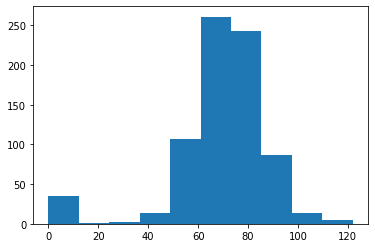

In [10]:
plt.hist(prima_df['bp'])

In [41]:
df0=prima_df[prima_df['outcome']==0]
df1=prima_df[prima_df['outcome']==1]

In [16]:
df0.shape,df1.shape

((500, 9), (268, 9))

In [29]:
from scipy.stats import ttest_ind,shapiro,mannwhitneyu

In [24]:
ttest_ind(df0['bp'],df1['bp'])

Ttest_indResult(statistic=-4.65097622072597, pvalue=3.8908354906479115e-06)

In [31]:
ttest_ind(df0['sft'],df1['sft'])

Ttest_indResult(statistic=-2.0747001964159613, pvalue=0.03834770482049123)

In [42]:
for col in prima_df.columns[:-1]:
  tstat,pval=ttest_ind(df0[col],df1[col])
  print(pval)



5.065127298053476e-10
8.935431645289913e-43
3.8908354906479115e-06
0.03834770482049123
0.00028618646036031987
1.2298074873116022e-16
1.254607010148809e-06
2.2099754606654358e-11


In [30]:
mannwhitneyu(df0['bp'],df1['bp'])

MannwhitneyuResult(statistic=53157.5, pvalue=1.1171249510884064e-06)

In [37]:
bp=[]
for val in prima_df['bp']:
  if val>0:
    bp.append(val)
len(bp)
print(np.median(bp))

72.0


In [27]:
prima_df['bp'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: bp, dtype: float64

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <a list of 10 Patch objects>)

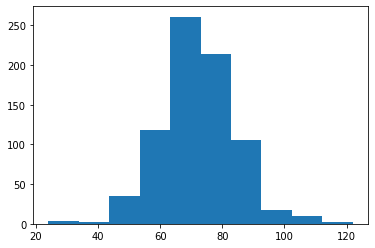

In [21]:
plt.hist(prima_df['bp'])

In [38]:
for i in np.arange(prima_df.shape[0]):
  if prima_df['bp'][i]==0:
    prima_df['bp'][i]=np.median(bp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
prima_df['bp'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: bp, dtype: float64

In [ ]:
prima_df.corr()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
sft,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
0.074752/0.466581

0.1602122675376837

In [43]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [59]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split

In [72]:
xtrain,xtest,ytrain,ytest=train_test_split(X_std,Y,test_size=0.3,random_state=0)

In [58]:
ytrain.value_counts()

0    345
1    192
Name: outcome, dtype: int64

In [64]:
LogReg=LogisticRegression()

In [73]:
LogReg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred=LogReg.predict(xtest)

In [75]:
from sklearn import metrics

In [76]:
acc=metrics.accuracy_score(ytest,y_pred)
print(acc*100)

76.62337662337663


In [77]:
ytest.value_counts()

0    157
1     74
Name: outcome, dtype: int64

In [78]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[141  16]
 [ 38  36]]


In [79]:
(141+36)/(157+74)

0.7662337662337663

In [ ]:
X['ins'].std()

115.24400235133837

In [ ]:
np.std(X['ins'],ddof=1)

115.24400235133837

In [ ]:
#Replace all 0 entries with Median values and then apply Log Transform and verify BE and VE

In [ ]:
#X['bp']=np.log(X['bp']+1e-10)

In [ ]:
X.head()

,preg,glu,bp,sft,ins,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
from scipy.stats import ttest_ind,shapiro,mannwhitneyu

In [ ]:
df0=prima_df[prima_df['outcome']==0]
df1=prima_df[prima_df['outcome']==1]


In [ ]:
ttest_ind(df0['bp'],df1['bp'])

Ttest_indResult(statistic=-4.65097622072597, pvalue=3.8908354906479115e-06)

In [ ]:
ttest_ind(df0['sft'],df1['sft'])

Ttest_indResult(statistic=-2.0747001964159613, pvalue=0.03834770482049123)

In [ ]:
ttest_ind(df0['ins'],df1['ins'])

Ttest_indResult(statistic=-3.64432538765356, pvalue=0.00028618646036031987)

In [ ]:
mannwhitneyu(df0['bp'],df1['bp']) #Two sample t-Test (Non-parametric)

MannwhitneyuResult(statistic=55414.5, pvalue=3.7792562301197405e-05)

In [ ]:
mannwhitneyu(df0['sft'],df1['sft']) #Two sample t-Test (Non-parametric)

MannwhitneyuResult(statistic=59814.0, pvalue=0.006480914779945946)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_update=X.drop('bp',axis=1)


In [ ]:
X_update.head()

,preg,glu,sft,ins,bmi,dpf,age
0,6,148,35,0,33.6,0.627,50
1,1,85,29,0,26.6,0.351,31
2,8,183,0,0,23.3,0.672,32
3,1,89,23,94,28.1,0.167,21
4,0,137,35,168,43.1,2.288,33


In [ ]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [ ]:
X_std.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_std,Y,test_size=0.3,random_state=0)

In [ ]:
from sklearn import model_selection

In [ ]:
LR=LogisticRegression()
NB=GaussianNB()

In [ ]:
LR.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=LR.predict(xtest)

In [ ]:
from sklearn import metrics

In [ ]:
ytest.value_counts()

0    157
1     74
Name: outcome, dtype: int64

In [ ]:
acc=metrics.accuracy_score(ytest,y_pred)
print(acc*100)

76.62337662337663


In [ ]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[141  16]
 [ 38  36]]


In [ ]:
36/74

0.4864864864864865

In [ ]:
141/157

0.8980891719745223

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
768/5

153.6

In [ ]:
kf=model_selection.KFold(shuffle=True,n_splits=5,random_state=0) #we can shuffle the data,we can set random_state
score=model_selection.cross_val_score(LR,X_std,Y,cv=kf,scoring='roc_auc')
np.mean(1-score),np.std(score,ddof=1)

(0.1695980278930135, 0.019651133859342175)

In [ ]:
print('Bias_error',np.mean(1-score)) #with BP

Bias_error 0.1695980278930135


In [ ]:
print('Var_Error',np.std(score,ddof=1)) #with BP

Var_Error 0.019651133859342175


In [ ]:
(0.169-0.167)/0.169   #which implies 1.18% change in Bias Error

0.011834319526627229

In [ ]:
(0.0227-0.0196)/0.0227 #which implies 13.65% change in VE

0.13656387665198247

In [ ]:
kf=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
score=model_selection.cross_val_score(NB,X_std,Y,cv=kf,scoring='roc_auc')
np.mean(1-score),np.std(score,ddof=1)

(0.19074559548486053, 0.037771585980668244)

In [ ]:
model.fit(X_std,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test=X_std[5,:]
test_x=np.array([test])
test_x

array([[ 0.3429808 , -0.15318486,  0.22493077, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966]])

In [ ]:
model.predict(test_x)

array([0])

In [ ]:
print('Bias_error',np.mean(1-score))

Bias_error 0.1689601677148847


In [ ]:
print('Var_error',np.std(score,ddof=1))

Var_error 0.025112582741715354


In [ ]:
(0.0264-0.025)/0.0264

0.05303030303030297

#Model without 'Bp', BE=0.168, VE=0.025
#Model with 'Bp' without any treatment,BE=0.167,VE=0.0264
#Model with 'BP' after log transformed,BE=0.1689,VE=0.0251

In [ ]:
knn=KNeighborsClassifier(n_neighbors=92,weights='distance')
kf=model_selection.KFold(shuffle=True,n_splits=5,random_state=0) #we can shuffle the data,we can set random_state
score=model_selection.cross_val_score(knn,X_std,Y,cv=kf,scoring='roc_auc')
np.mean(1-score),np.std(score,ddof=1)

(0.17468987885430426, 0.03495135885301841)

In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
#n_neighbors ideal search range could be 15-20% of size of data
param={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
kf=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
GS=GridSearchCV(knn,param,cv=kf,scoring='roc_auc')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': 

In [ ]:
GS.best_params_            #we got highest avg of auc

{'n_neighbors': 92, 'weights': 'distance'}

In [ ]:
#Customized Grid Search 
knn_be=[]
knn_ve=[]
for i in np.arange(1,100):
  knn=KNeighborsClassifier(n_neighbors=i,weights='distance')
  kf=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  score=model_selection.cross_val_score(knn,X_std,Y,cv=kf,scoring='roc_auc')
  knn_be.append(np.mean(1-score)),knn_ve.append(np.std(score,ddof=1))

In [ ]:
np.min(knn_be),np.argmin(knn_be),knn_ve[92] #uniform mode (93)

(0.1765437817802393, 92, 0.03474322902020491)

In [ ]:
np.min(knn_be),np.argmin(knn_be),knn_ve[92] #distance mode (92)

(0.17468987885430426, 91, 0.03447688844769535)

In [ ]:
np.min(knn_ve),np.argmin(knn_ve),knn_be[9]#uniform mode

(0.02885076130491499, 9, 0.21056377297569767)

In [ ]:
np.min(knn_ve),np.argmin(knn_ve),knn_be[9]#distance mode

(0.02922508420873182, 9, 0.20753563124311442)

In [ ]:
knn_be[10]

0.8031680642907058

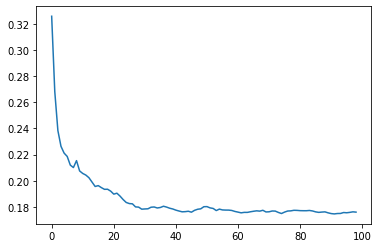

In [ ]:
x_axis=np.arange(len(knn_be))
plt.plot(x_axis,knn_be)